# Tutorial 4: Naive Bayes 

In lecture we learned... what do we do when the likelihood is no longer tractable?

One option is to enforce simplifying assumptions to preserve the tractability of the likelihood, with an alg called Naive Bayes.

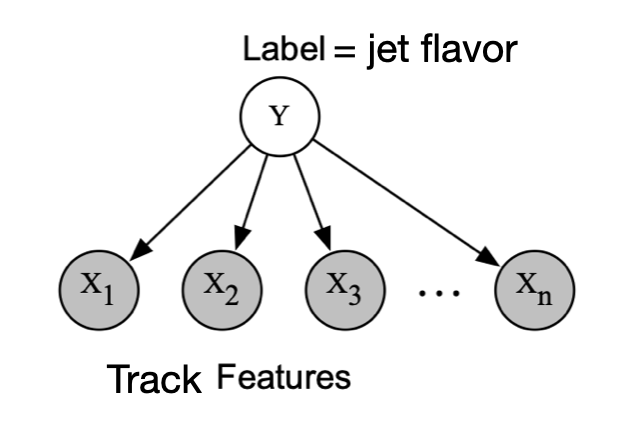

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Physics application:** $b$-tagging

$b$-hadrons have a characteristically ``long'' lifetime of $10^{-12}$ s, which we can observe by a measureable $\mathcal{O}$(mm) displacement from the main proton constitudent collision point, at the **primary vertex**.

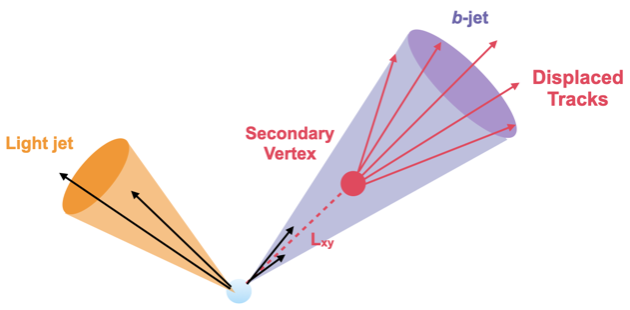

The variables we use to characterize this displacement of the track is this displacement, projected in the planes transervse to the proton flight path ($d_0$) and parallel to the flight path $z_0 \sin \theta$.

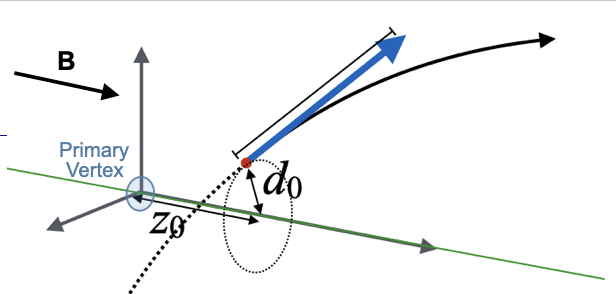

In [ ]:
# !pip install uproot


In [ ]:
# pcle phys specific packages -- natively handle variable length ``events''
# w/o applying masking
import uproot
import awkward as ak

Open dataset

In [ ]:
cols = [f"trk_{v}" for v in ["d0", "z0", "d0err", "z0err"]]
cols += ["jet_flav"]

In [ ]:
t = uproot.open("example.root:tree")
arr = t.arrays(cols)

In [ ]:
# The labels of the jet
y = arr['jet_flav']

In [ ]:
np.unique(y)

^^ What do these labels mean?
- y= 5: $b$-jet (our signal)
- y=0: light-jet (our background)
- y=4: $c$-jet  (ignore for this problem)

**Features for Naive Bayes:**

$$X_i = \begin{pmatrix} 
s_{d0} \\
s_{z0}
\end{pmatrix}$$

where $s_{d0} = d_0 / \sigma_{z0}$, $s_{z0} = z_0 / \sigma_{z0}$

In [ ]:

sd0 = arr["trk_d0"] / arr["trk_d0err"]
sz0 = arr["trk_z0"] / arr["trk_z0err"]

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

clip = (-10, 10)
kwargs = dict(bins=100, histtype="step", density=True, log=True)

ax[0].hist(
    np.clip(ak.flatten(sd0[y == 5]), *clip),
    color="rebeccapurple",
    label="b-jet",
    **kwargs,
)
ax[0].hist(
    np.clip(ak.flatten(sd0[y == 0]), *clip),
    color="darkorange",
    label="light jet",
    **kwargs,
)

"""
Q1: Also plot the 1d z0 dist

"""

ax[0].set_xlabel("$sd0 = d_{0} / \sigma(d_{0})$", fontsize=14)
ax[1].set_xlabel("$sz0 = z_{0} / \sigma(z_{0})$", fontsize=14)

ax[0].legend()
ax[1].legend()

plt.show()


In [ ]:
import matplotlib.colors as colors

In [ ]:
"""
Q2: To build up the conditional probabilities, we actually want to look at 
the 2d histograms, you're challenge, define these $p(X_i |)$

"""

fig, ax = plt.subplots(1, 3, figsize=(11, 2.75))

clip = (-5,5)
nbins =  # your decision here
p_b, ex, ey, _ =  ... # your code

p_l, *_ = ... # your code


# Then use the p_b and p_l histos to define the negative log likelihood ratio
# (provided)
llr = np.log(p_b) - np.log(p_l) # log likelihood ratio

vscale = np.max(abs(llr))

cbar = ax[2].imshow(
    llr.T,
    origin="lower",
    vmin=-vscale, 
    vmax=vscale,
    extent=[*clip, *clip],
    cmap="PuOr",  
)
# fig.colorbar(cbar, ax = ax[2],shrink=.7)

ax[0].set_title('p_b')
ax[1].set_title("p_l")
ax[2].set_title("log(p_b / p_l)")

for axi in ax:
    axi.set_xlabel("sd0", fontsize=12)
    axi.set_ylabel("sz0",fontsize=12)

# p_l = plt.hist2d()

In [ ]:
''' 
Code snippet below: define the indices for the bin 
an (sd0, sz0) track is in
'''

i0 = np.digitize(
    np.clip(ak.flatten(sd0), *clip).to_numpy(),
    bins=ex,
)-1
i1 = np.digitize(
    np.clip(ak.flatten(sz0), *clip).to_numpy(),
    bins=ey,
)-1

print('min',min(i0), min(i1))
print("max", max(i0), max(i1))

i0 = ak.where(i0==nbins,nbins-1,i0)
i1 = ak.where(i1 == nbins, nbins - 1, i1)

In [ ]:
# number of tracks passing a cut value
nTrks = ak.count(sd0,axis=1)
print(nTrks)

In [ ]:
kwargs = dict(bins=15, range=(-0.5, 14.5), histtype="step")
plt.hist(nTrks,color='rebeccapurple',**kwargs)
plt.legend()
plt.xlabel('n tracks')
plt.ylabel("Entries")

In [ ]:
# log likelihood ratio calculated for each track
llr_trk_i = ak.unflatten(llr[i0,i1],nTrks)


In [ ]:
'''
Q3: Your task, find the log likelihood for each jet
'''

llr_jet = 

In [ ]:
"""
Q4: Plot the distribtuion of llr_jet for the b and light jets
"""


In [ ]:
# Q5: Plot the ROC curve
# y-axis: true positive rate
# x-axis: false positive rate


How did the Naive Bayes alg do? Is it working??